In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import statsmodels.api as sm
import math

In [3]:
#ESERCIZIO 1

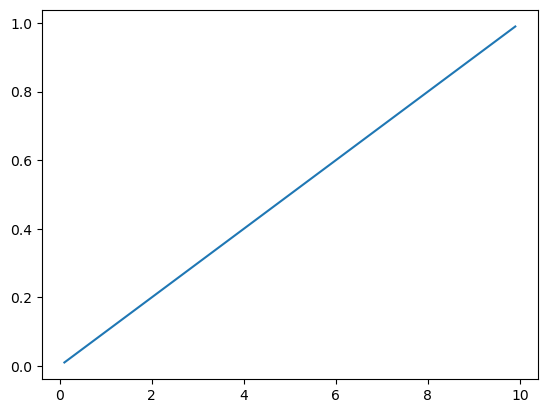

In [6]:
#1.2
U = st.uniform(0,10)
x = np.linspace(U.ppf(0.01), U.ppf(0.99), num = 20)
plt.plot(x, U.cdf(x))
plt.show()

In [ ]:
#ESERCIZIO 3

In [13]:
#3.1 Caricare il dataset
lotteria = pd.read_csv('lotteria.csv', sep = ';', decimal = '.')
lotteria

,Settimana,numero_biglietto,valore_vincente
0,13,9,7.350000
1,10,7,1.956000
2,7,8,3.117000
3,7,2,7.232000
4,1,0,1.059000
5,21,8,9.724000
6,14,6,0.509472
7,17,10,5.381000
8,1,1,3.715000
9,1,7,2.068000


In [14]:
pd.isnull(lotteria).sum()

Settimana           0
numero_biglietto    0
valore_vincente     0
dtype: int64

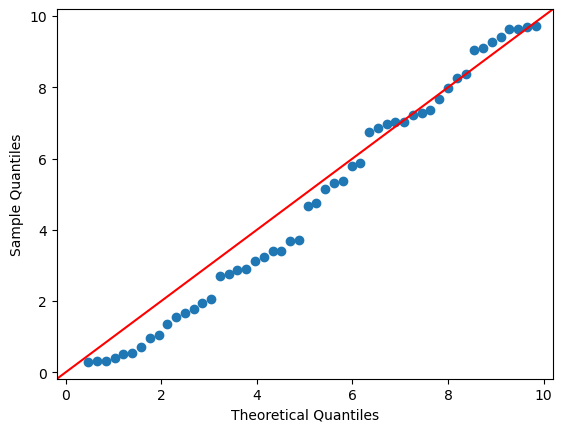

Il qqplot ci permette di confrontare i quantili reali dell attributo con quelli teorici della relativa variabile aleatoria
uniforme. Come si vede, i valori si distribuiscono piuttosto bene sulla bisettrice, per cui è sensato dire che il
valore_vincente segue una distribuzione uniforme.


In [23]:
'''
2.2 Utilizzare un opportuno metodo grafico per valutare l'ipotesi che i valori dell'attributo 
valore_vincente seguano effettivamente la distribuzione uniforme continua e commentate i risultati.
'''
sm.qqplot(lotteria.valore_vincente, st.uniform(lotteria.valore_vincente.min(), lotteria.valore_vincente.max()), line = '45')
plt.show()
print('Il qqplot ci permette di confrontare i quantili reali dell attributo con quelli teorici della relativa variabile aleatoria\nuniforme. Come si vede, i valori si distribuiscono piuttosto bene sulla bisettrice, per cui è sensato dire che il\nvalore_vincente segue una distribuzione uniforme.')

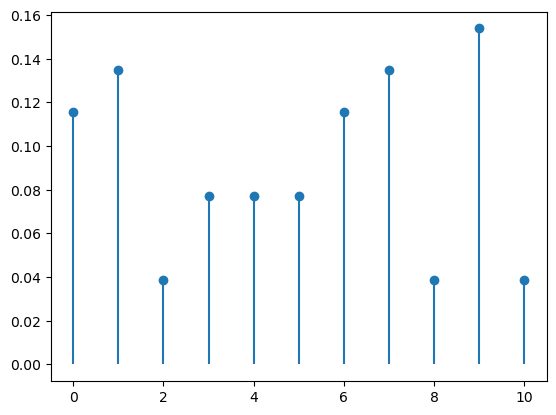

Anche se abbiamo pochi valori, possiamo notare come le frequenze relative siano più o meno simili.


In [26]:
'''
2.3 Valutate l'ipotesi che i valori dell'attributo numero_biglietto siano effettivamente estratti dalla distribuzione 
uniforme discreta, motivando la scelta e commentando i risultati
'''
x = range(0, 11, 1)
y = lotteria.numero_biglietto.value_counts(normalize=True).sort_index()
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)
plt.show()
print('Anche se abbiamo pochi valori, possiamo notare come le frequenze relative siano più o meno simili.')

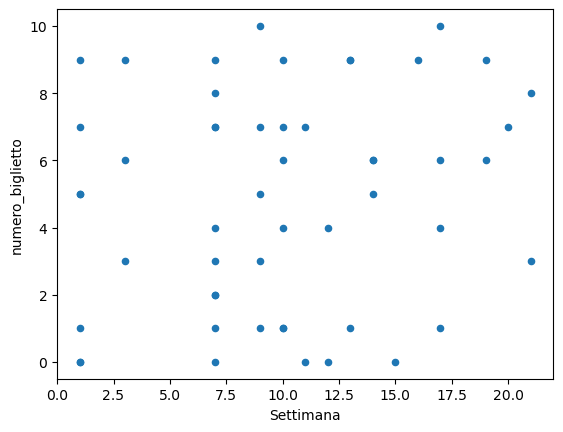

Lo scatter plot evidenzia come non vi sia alcuna relazione tra la settimana e il numero del biglietto.
0.1684136247556131
L indice di correlazione tra i due attributi prossimo a 0 conferma tale ipotesi.


In [29]:
#2.4 Esiste una relazione tra settimana e numero biglietti?
lotteria.plot.scatter('Settimana', 'numero_biglietto')
plt.show()
print('Lo scatter plot evidenzia come non vi sia alcuna relazione tra la settimana e il numero del biglietto.')
print(lotteria['Settimana'].corr(lotteria['numero_biglietto']))
print('L indice di correlazione tra i due attributi prossimo a 0 conferma tale ipotesi.')

In [30]:
#ESERCIZIO 4

In [31]:
#4.1 Aggiungere un attributo vincita che sia 1 in caso di vittoria e 0 altrimenti
lotteria["vincita"] = (lotteria.numero_biglietto < lotteria.valore_vincente).astype(int)
lotteria

,Settimana,numero_biglietto,valore_vincente,vincita
0,13,9,7.350000,0
1,10,7,1.956000,0
2,7,8,3.117000,0
3,7,2,7.232000,1
4,1,0,1.059000,1
5,21,8,9.724000,1
6,14,6,0.509472,0
7,17,10,5.381000,0
8,1,1,3.715000,1
9,1,7,2.068000,0


In [33]:
'''
4.2 Create una serie che associa ad ogni settimana il corrispondente numero di vincite e memorizzate in una 
variabile vincite_settimanali usando groupby.
'''
vincite_settimanali = lotteria.groupby('Settimana').vincita.sum()
vincite_settimanali

Settimana
1     5
3     2
7     5
9     4
10    3
11    1
12    2
13    1
14    2
15    1
16    1
17    1
19    0
20    1
21    1
Name: vincita, dtype: int32

In [34]:
'''
4.3 Quale distribuzione vi aspettate che seguano i valori contenuti in vincite_settimanali? Perchè? 
(sugg: può aiutare a rispondere il ragionamento che avete fatto per rispondere ad alcuni punto dell'esercizio 2).
'''
print('I valori di vincite_settimanali seguono una distribuzione di tipo binomiale perchè contano il numero di successi in un esperimento bernoulliano, dove l esperimento è la vincita in una certa settimana')

I valori di vincite_settimanali seguono una distribuzione di tipo binomiale perchè contano il numero di successi in un esperimento bernoulliano, dove l esperimento è la vincita in una certa settimana


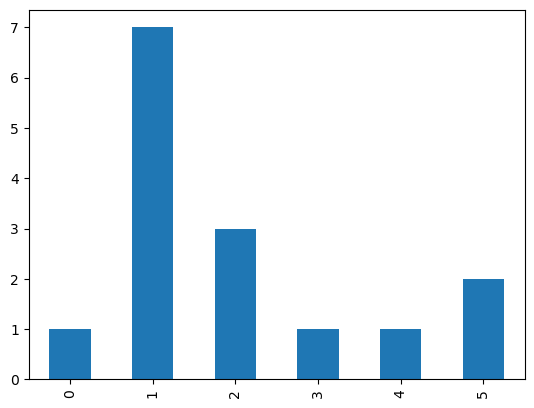

In [40]:
#4.4 Verificate se i valori ottenuti in vincite_settimanali sono coerenti rispetto alla risposta di prima
vincite_settimanali.value_counts().sort_index().plot.bar()
plt.show()

In [42]:
'''
4.6  Utilizzate il dataset a disposizione per stimare la probabilità di vincita alla lotteria. Che stimatore 
avete utilizzato? Di qualce proprietà gode questo stimatore?
'''
print(lotteria.vincita.mean())
print('Come stimatore ho usato la media campionaria, che in quanto tale è uno stimatore non distorto per il valore atteso della popolazione ed è anche consistente in media quadratica.')

0.5769230769230769
Come stimatore ho usato la media campionaria, che in quanto tale è uno stimatore non distorto per il valore atteso della popolazione ed è anche consistente in media quadratica.


In [43]:
'''
4.7 I dati a disposizione vi permettono di dire che con probabilità superiore a 0.9 l'errore fatto 
utilizzando la stima al punto precedente è più piccolo di 0.01? motivate il ragionamento.
'''
print('procedimento su foglio.')

procedimento su foglio.


In [44]:
'''
Nei due punti successivi supporremo che il numero settimanale di vittorie sia distribuito secondo una 
legge binomiale di parametri m e p. Stimeremo quest'ultimo parametro come nel punto 6. e supporremo che 
in una settimana siano stati venduti solo 10 biglietti.
'''

"\nNei due punti successivi supporremo  che il numero settimanale di vittorie sia distribuito secondo una legge binomiale di parametri m e p. Stimeremo quest'ultimo parametro come nel punto 6. e supporremo che in una settimana siano stati venduti solo 10 biglietti.\n"

In [51]:
'''
4.8 Sulla base di questa nuova ipotesi calcolate la probabilità che in una settimana
- Non vi sia alcun biglietto vincente
- Vi sia esattamente un biglietto vincente
- VI si almeno un biglietto vincente
- Vi sia almeno la metà dei biglietti venduti vincenti
(suggerimento: per rispondere a questo ultimo quesito è necessario calcolare un valore di sommatoria: potete farlo a mano, 
sfruttare le librerie o scrivere codice esplicito)
'''
Y = st.binom(10, lotteria.vincita.mean())
print('Probabilità nessuna vincita:', Y.pmf(0))
print('Probabilità almeno un biglietto vincente:', Y.pmf(1))
print('Probabilità almeno un biglietto vincente:', 1-Y.cdf(1)+Y.pmf(0))
print('Probabilità almeno metà dei biglietti vincente:', 1-Y.cdf(5))

Probabilità nessuna vincita: 0.00018373562536617746
Probabilità almeno un biglietto vincente: 0.002505485800447871
Probabilità almeno un biglietto vincente: 0.9974945141995522
Probabilità almeno metà dei biglietti vincente: 0.5742963535944303


In [54]:
'''
4.9 Ho acquistato un biglietto, e scopro di aver vinto guardando il risultato dell'estrazione. Qual è 
la probabilità che almeno la metà dei biglietti venduti siano vincenti?
'''
print(((1-Y.cdf(5)+Y.pmf(5))*(1-Y.cdf(0)))/(1-Y.cdf(0)))

0.7926129651593077
0.7924292295339417


In [57]:
'''
4.10 Ipotizzando che il numero di biglietti venduti in una settimana salga a m=1500, rispondete 
nuovamente alla domanda posta al punto precedente. In questo caso è opportuno ridurre le 
approssimazioni in più rispetto a quanto precedentemente svolto? In caso affermativo indicate 
quali sono queste approssimazioni e motivatene l'utilizzo
'''
print('Essendo m diventato così grande, ha senso approssimare il numero settimanale di vittorie ad una normale applicando il TCL.')
m = 1500
p = lotteria.vincita.mean()
Z = st.norm(m*p, math.sqrt(m*p*(1-p)))
print(1-Z.cdf(749))

Essendo m diventato così grande, ha senso approssimare il numero settimanale di vittorie ad una normale applicando il TCL.
0.9999999994083444
